In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def load_files(path, ext='csv'):
    all_files = glob.glob(path + '*.csv')
    return all_files

fashion_files = load_files('./results/fashion/')
fashion_files

['./results/fashion/predictions_GradientBoostingRegressor.csv',
 './results/fashion/predictions_RandomForestRegressor.csv',
 './results/fashion/predictions_MLPRegressor.csv',
 './results/fashion/predictions_XGBRegressor.csv',
 './results/fashion/predictions_SGDRegressor.csv',
 './results/fashion/predictions_SVR.csv',
 './results/fashion/predictions_KNeighborsRegressor.csv']

In [3]:
def get_model_names(files):
    model_names = []
    for file in files:
        # Extract the model name from the file path
        model_name = file.split('/')[-1].replace('predictions_', '').replace('.csv', '')
        model_names.append(model_name)
    return model_names

model_names = get_model_names(fashion_files)
model_names

['GradientBoostingRegressor',
 'RandomForestRegressor',
 'MLPRegressor',
 'XGBRegressor',
 'SGDRegressor',
 'SVR',
 'KNeighborsRegressor']

In [4]:
def find_highest_impact_results_df(files):
    results_df =  pd.DataFrame()
    # Iterate over each CSV file
    for file in files:
        # Extract the model name from the file path
        model_name = file.split('/')[-1].replace('predictions_', '').replace('.csv', '')
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file)
        # Iterate over each row in the DataFrame
        for index, row in df.iterrows():
            product_id = row['asin']
            # Check if the 'userId' column exists in the 'results_df' DataFrame
            if 'asin' not in results_df.columns:
                # Create a new 'userId' column with initial NaN values
                results_df['asin'] = product_id
            # Check if the userId already exists in the results_df DataFrame
            if product_id not in results_df['asin'].values:
                # Concatenate the new user DataFrame with the existing 'results_df' DataFrame
                results_df = pd.concat([results_df, pd.DataFrame({'asin': [product_id]})], ignore_index=True)
            
            # Add a new column to the results_df DataFrame with the highest impact dimension
            dim_column_name = f'highestImpact_{model_name}'
            highest_impact_dim = df[['mse_wo_sentiment_polarity','mse_wo_price','mse_wo_rank','mse_wo_full_refund','mse_wo_free_shipping','mse_wo_return','mse_wo_women','mse_wo_size']].idxmax(axis=1)[index]
            # Add a new column to the results_df DataFrame with the mse value
            mse_column_name = f'highestMSE_{model_name}'
            results_df.loc[results_df['asin'] == product_id, mse_column_name] = row[highest_impact_dim]
            results_df.loc[results_df['asin'] == product_id, dim_column_name] = highest_impact_dim.replace('mse_wo_', '')

    return results_df

In [5]:
fashion_results_df = find_highest_impact_results_df(fashion_files)
fashion_results_df

,asin,highestMSE_GradientBoostingRegressor,highestImpact_GradientBoostingRegressor,highestMSE_RandomForestRegressor,highestImpact_RandomForestRegressor,highestMSE_MLPRegressor,highestImpact_MLPRegressor,highestMSE_XGBRegressor,highestImpact_XGBRegressor,highestMSE_SGDRegressor,highestImpact_SGDRegressor,highestMSE_SVR,highestImpact_SVR,highestMSE_KNeighborsRegressor,highestImpact_KNeighborsRegressor
0,B00GXE331K,2.063573,sentiment_polarity,2.066647,size,2.148226e+00,return,2.063573,sentiment_polarity,1.786225e+34,women,2.854878,sentiment_polarity,3.058537,sentiment_polarity
1,B0017JF4FO,1.738255,sentiment_polarity,1.739983,size,1.104592e+04,size,1.738255,sentiment_polarity,2.189174e+40,size,2.384085,sentiment_polarity,1.721127,sentiment_polarity
2,B004HX6P1E,1.196533,sentiment_polarity,1.197565,return,2.314567e+00,price,1.196533,sentiment_polarity,1.024590e+36,full_refund,1.457887,sentiment_polarity,1.220282,sentiment_polarity
3,B00XTM0ZPG,1.584260,sentiment_polarity,1.585102,price,1.599755e+00,free_shipping,1.584260,sentiment_polarity,4.200894e+33,price,2.071972,sentiment_polarity,2.221831,sentiment_polarity
4,B00LKWYX2I,1.384742,sentiment_polarity,1.384789,women,1.434755e+00,full_refund,1.384742,sentiment_polarity,6.392700e+30,women,1.702166,sentiment_polarity,1.824885,sentiment_polarity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,B0071R3426,2.342836,sentiment_polarity,2.345719,price,9.356956e+08,size,2.342835,sentiment_polarity,1.176613e+41,price,2.560000,sentiment_polarity,4.225000,sentiment_polarity
91,B000ML9S14,0.789721,sentiment_polarity,0.791014,size,2.020791e+07,return,0.789720,sentiment_polarity,3.895516e+37,size,0.860000,sentiment_polarity,0.815000,sentiment_polarity
92,B00XH81JVG,2.219909,sentiment_polarity,2.220321,rank,2.294406e+06,women,2.219909,sentiment_polarity,7.690655e+35,sentiment_polarity,2.400000,sentiment_polarity,2.675000,sentiment_polarity
93,B00HWZQRE4,2.807659,sentiment_polarity,2.818586,free_shipping,4.019005e+08,sentiment_polarity,2.807659,sentiment_polarity,3.930244e+40,return,4.560000,sentiment_polarity,3.410000,sentiment_polarity


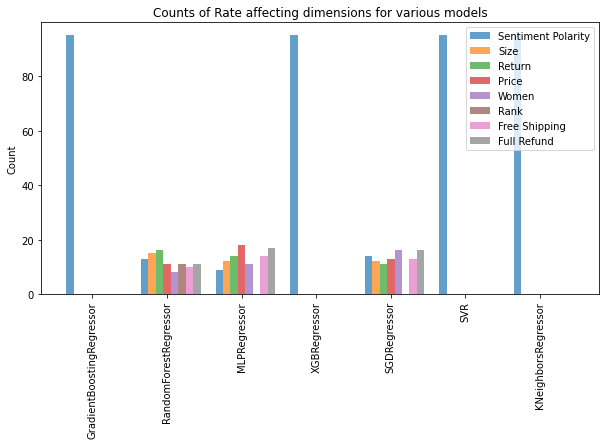

In [19]:
sentiment_polarity_counts = []
size_counts = []
return_counts = []
price_counts = []
women_counts = []
rank_counts = []
free_shipping_counts = []
full_refund_counts = []

for model_name in model_names:
    highest_impact_col = f'highestImpact_{model_name}'
    sentiment_polarity_count = fashion_results_df[highest_impact_col].value_counts().get('sentiment_polarity', 0)
    size_count = fashion_results_df[highest_impact_col].value_counts().get('size', 0)
    return_count = fashion_results_df[highest_impact_col].value_counts().get('return', 0)
    price_count = fashion_results_df[highest_impact_col].value_counts().get('price', 0)
    women_count = fashion_results_df[highest_impact_col].value_counts().get('women', 0)
    rank_count = fashion_results_df[highest_impact_col].value_counts().get('rank', 0)
    free_shipping_count = fashion_results_df[highest_impact_col].value_counts().get('free_shipping', 0)
    full_refund_count = fashion_results_df[highest_impact_col].value_counts().get('full_refund', 0)
    
    sentiment_polarity_counts.append(sentiment_polarity_count)
    size_counts.append(size_count)
    return_counts.append(return_count)
    price_counts.append(price_count)
    women_counts.append(women_count)
    rank_counts.append(rank_count)
    free_shipping_counts.append(free_shipping_count)
    full_refund_counts.append(full_refund_count)


# Set the x-axis positions
x_pos = np.arange(len(model_names)) 

# Set the width of each bar
bar_width = 0.1

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the bar plot
plt.bar(x_pos - bar_width * 3, sentiment_polarity_counts, width=bar_width, label='Sentiment Polarity', alpha=0.7)
plt.bar(x_pos - bar_width * 2, size_counts, width=bar_width, label='Size', alpha=0.7)
plt.bar(x_pos - bar_width, return_counts, width=bar_width, label='Return', alpha=0.7)
plt.bar(x_pos, price_counts, width=bar_width, label='Price', alpha=0.7)
plt.bar(x_pos + bar_width, women_counts, width=bar_width, label='Women', alpha=0.7)
plt.bar(x_pos + bar_width * 2, rank_counts, width=bar_width, label='Rank', alpha=0.7)
plt.bar(x_pos + bar_width * 3, free_shipping_counts, width=bar_width, label='Free Shipping', alpha=0.7)
plt.bar(x_pos + bar_width * 4, full_refund_counts, width=bar_width, label='Full Refund', alpha=0.7)

# Set the x-axis labels
plt.xticks(x_pos, model_names, rotation=90)

# Set the y-axis label
plt.ylabel('Count')

# Set the plot title
plt.title('Counts of Rate affecting dimensions for various models')

# Add a legend
plt.legend()

# Show the plot
plt.show()

